# **Welcome to the Ultimate Machine Learning Adventure**

Dive into this comprehensive notebook and embark on an exciting journey through the entire machine learning lifecycle, from data ingestion to deployment. This notebook is crafted to empower you to run full-scale projects from scratch, offering inspiration and guidance for end-to-end machine learning endeavors.

# What Will We Use Today:

* MLflow: Seamlessly manage the machine learning lifecycle,
covering experimentation, reproducibility, and deployment.
* Docker: Containerize your applications for consistent, scalable, and reproducible environments.
* Flask: Develop and deploy your machine learning models as powerful web applications.
* HTML/CSS: Design sleek and responsive web interfaces to interact with your models effortlessly.
* GitHub: Harness version control to efficiently manage your codebase and collaborate seamlessly.

With this notebook, you'll gain the skills to build and deploy robust machine learning projects, transforming raw data into valuable insights and functional applications. Let's dive in and explore how these powerful tools and technologies can bring your machine learning ideas to life!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score, f1_score, mean_squared_error

import mlflow
import mlflow.sklearn

import joblib

# Read Data

In [3]:
def style_dataframe(df):
  """
  Applies a consistent styling to the DataFrame.

  Parameters:
      df (pd.DataFrame): The DataFrame to style.

  Returns:
      pd.io.formats.style.Styler: The styled DataFrame.
  """
  # Use a color palette for header and even/odd rows
  palette = sns.color_palette("coolwarm", n_colors=63)

  return df.style.set_table_styles(
      [
          {
              'selector': 'thead th',
              'props': [
                  ('background-color', palette[0]),  # First color from palette for header
                  ('color', '#FFFFFF'),  # White text for header
                  ('font-weight', 'bold'),
                  ('text-align', 'center'),
                  ('border', f'1px solid {palette[0]}'),  # Same color as header background for border
              ]
          },
          {
              'selector': 'tbody td',
              'props': [
                  ('background-color', '#FFFFFF'),  # White background for cells
                  ('border', '1px solid #DDDDDD'),  # Light grey border for cells
                  ('color', '#333333'),  # Dark grey text for better readability
              ]
          },
          {
              'selector': 'tbody tr:nth-child(even) td',
              'props': [
                  ('background-color', palette[1])  # Second color from palette for even rows
              ]
          },
          {
              'selector': 'tbody tr:nth-child(odd) td',
              'props': [
                  ('background-color', palette[2])  # Third color from palette for odd rows
              ]
          }
      ]
  ).set_properties(**{'text-align': 'center'}).set_table_attributes('style="width:100%;"').hide(axis='index')


In [4]:
# Read the data from a CSV file (replace 'your_data.csv' with your actual file path)
df = pd.read_csv(r"C:\Users\Moin\Science learning\Data_Projects\Machine Learning\Self_learning\csv\placement.csv")

# Optionally, display the rows using head()
style = style_dataframe(df.head(4))
display(style)  # Use display to render the styled DataFrame


cgpa,package
6.890000,3.260000
5.120000,1.980000
7.820000,3.250000
7.420000,3.670000


# Getting Started With MlFlow!

In [5]:
mlflow.set_experiment('cgpa_model')

<Experiment: artifact_location='file:///C:/Users/Moin/Science%20learning/Kaggle/Kaggle.notebookv1/mlruns/249768216210873357', creation_time=1723044175335, experiment_id='249768216210873357', last_update_time=1723044175335, lifecycle_stage='active', name='cgpa_model', tags={}>

# Explore Dataset & Visualize Data

In [6]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [7]:
df.describe()

,cgpa,package
count,1854.000000,1854.000000
mean,6.993592,2.997104
std,1.067733,0.689430
min,4.260000,1.370000
25%,6.190000,2.490000
50%,6.960000,2.990000
75%,7.730000,3.490000
max,9.580000,4.620000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     1854 non-null   float64
 1   package  1854 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


In [9]:
corr = df.corr()
corr

,cgpa,package
cgpa,1.000000,0.880716
package,0.880716,1.000000


C:\Users\Moin\AppData\Local\Temp\ipykernel_9468\2914660223.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Scatter Plot')


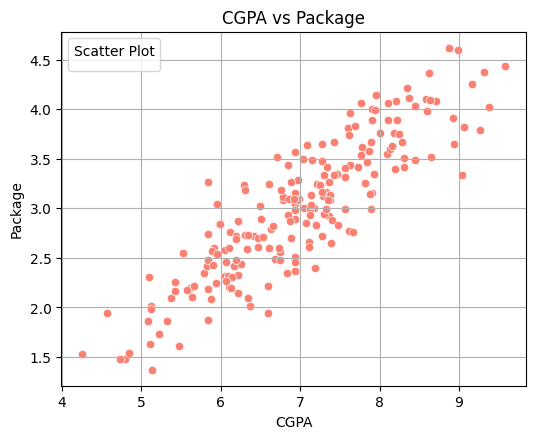

In [10]:
# Set plot size
plt.figure(figsize=(6, 4.6))

# Create the scatterplot with customization
sns.scatterplot(data=df, x='cgpa', y='package', color = 'Salmon')

# Add labels and title
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('CGPA vs Package')

# Grid and legend
plt.grid(True)
plt.legend(title='Scatter Plot')

# Show the plot
plt.show()

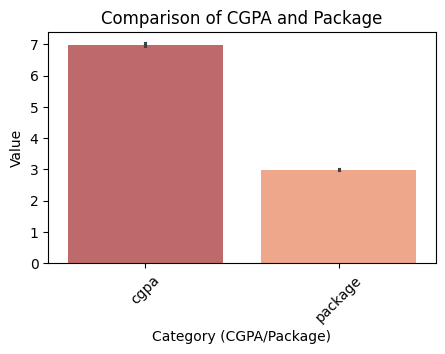

In [11]:
# Set plot size
plt.figure(figsize=(5, 3))

# Create the barplot with customization
sns.barplot(data=df, palette=['IndianRed', 'LightSalmon'])

# Add labels and title
plt.xlabel('Category (CGPA/Package)')
plt.ylabel('Value')
plt.title('Comparison of CGPA and Package')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

<Axes: >

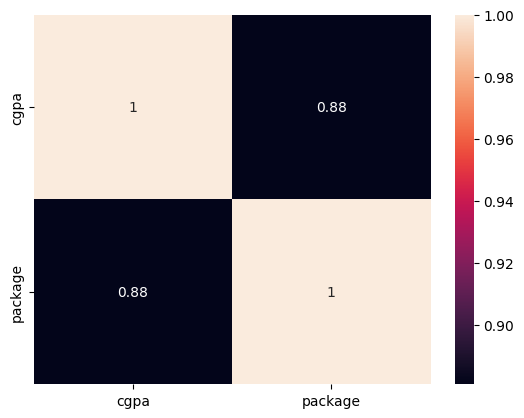

In [12]:
sns.heatmap(data = corr, annot = True)

# Prepare Data for Model

In [13]:
X= df[['cgpa']]
y = df['package']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
with mlflow.start_run():

    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)*100, model.score(X_test, y_test)*100

In [15]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

In [16]:
print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f'Score Test:{score}')

R2 Score: 0.9369627691380548
Mean Squared Error: 0.026040697452774444
Mean Absolute Error: 0.07185633696844573
Score Test:(95.32834293219665, 93.97316571803522)


# MlFlow Exprement Model LifeCycle

In [17]:
mlflow.log_metric('Mean Squared Error', mse)
mlflow.log_metric('Absolute Mean Error',mae)
mlflow.log_metric('R2 Score', r2)

In [18]:
mlflow.set_tag("Model type", 'Regression model')
mlflow.set_tag('algorithm', 'RandomForestRegressor')
mlflow.set_tag('Data Size', len(df))
mlflow.set_tag('Random_State','42')
mlflow.sklearn.log_model(model,'randomForest')

In [19]:
mlflow.end_run()

# Create Joblib File

In [20]:
import joblib

# Save the model
joblib.dump(model, 'model.joblib')

# Load the saved model
loaded_model = joblib.load('model.joblib')

# Use the loaded model for predictions
predictions = loaded_model.predict(X_test)

## This is Basic End to End Machine Learning Model I Created To Understand Easily

Model: Random Forest Regressor
Data: The model is trained on a dataset containing CGPA and corresponding placement package information.
Deployment: The model is deployed as a Flask application within a Docker container for easy deployment and scalability.
Prediction: Users can input a CGPA and receive a predicted placement package.

# Pull Image from dockerhub:   
**docker pull orhfusion/cgpa_prediction**

# Or you can refer to my GitHub repository to get files:   
https://github.com/OrhFusion/model.package_prediction.git


* Flask
* Html
* Dockerfile
* app.py
* Details
* Dependencies (requirements.txt5

Exposed: Port = 8000.